In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
y = [1, 2, 3, 5, 8, 13, 21]

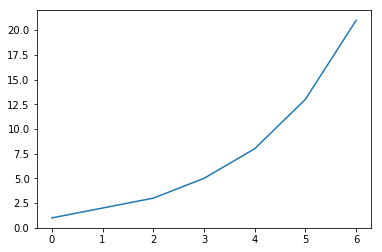

In [4]:
plt.plot(y);

In [5]:
x = [1, 6, 3, 9, 4, 16, 2]
# y's copied from above for easier reading
y = [1, 2, 3, 5, 8, 13, 21]

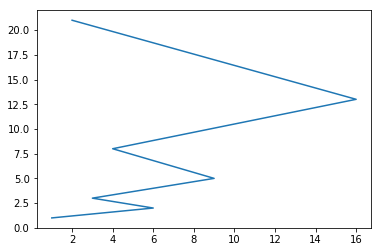

In [6]:
plt.plot(x, y)

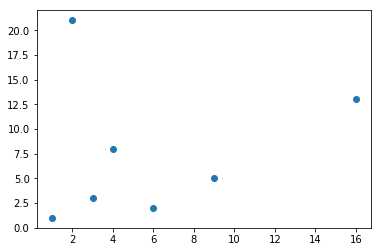

In [7]:
plt.scatter(x, y);

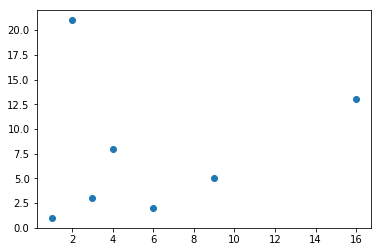

In [8]:
plt.plot(x, y, 'o');

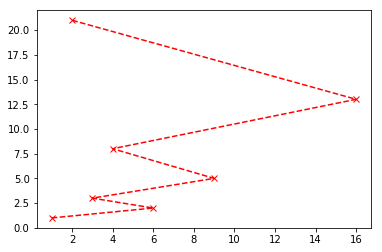

In [9]:
plt.plot(x, y, 'rx--');

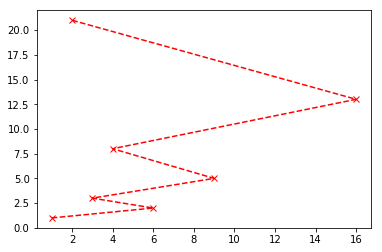

In [10]:
plt.plot(x, y, color='red', marker='x', linestyle='dashed')

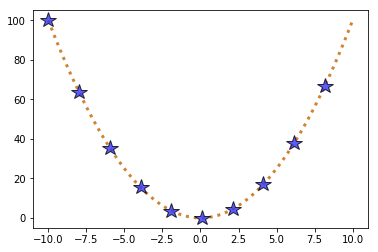

In [11]:
import numpy as np

# y = x^2 in the range of -10 to 10
x = np.linspace(-10, 10, 100)
y = x**2

plt.plot(x, y, color='#c26603', marker='*', markersize=16, markeredgecolor='black',
         markerfacecolor='#3333fc', linewidth=3, linestyle=':', alpha=0.8, markevery=10);

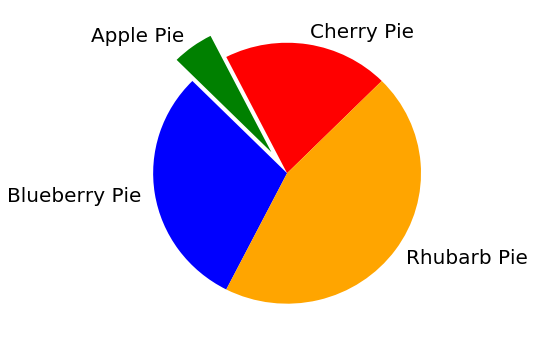

In [12]:
# Set the figure to a fixed size (6 x 6 inches)
plt.figure(figsize=(6, 6))

# Yes, it's a pie chart.
plt.pie([4, 1, 6, 9], explode=[0, 0.2, 0, 0], labels=["Cherry Pie", "Apple Pie", "Blueberry Pie", "Rhubarb Pie"],
        colors=["red", "green", "blue", "orange"], startangle=45, textprops={'fontsize': 20});

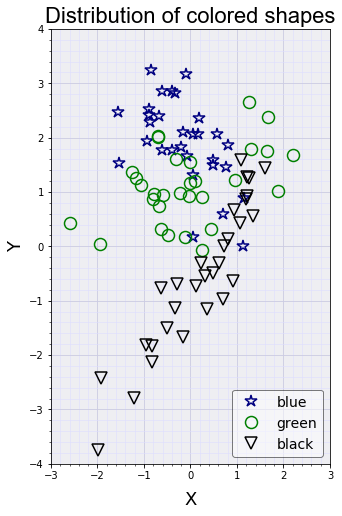

In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from matplotlib.lines import Line2D 
from IPython.core.display import display

# Create a new figure
fig = Figure(figsize=(5, 8))

# Attach a canvas to the figure
FigureCanvas(fig)

# Add a subplot (i.e., an Axes object)
ax = fig.add_subplot(1, 1, 1)

# Create some lines and add them to the plot.

# intercepts and slopes for the three data series
lines = [(2, -0.8), (1, 0.3), (-1, 1.2)]

# Other visual parameters that vary by line
colors = ['navy', 'g', 'k']
markers = ['*', 'o', 'v']
labels = ['blue', 'green', 'black']

# Loop over data series, construct Line2D for each one,
# and adding it to the subplot
for i in range(3):
    intercept, slope = lines[i]
    # Create some data
    x = np.random.normal(size=30)
    y = x * slope + np.random.normal(intercept, 0.6, size=30)
    # Make the line
    line = Line2D(x, y, marker=markers[i], linestyle='', color=colors[i],
                  markersize=12, fillstyle='none', markeredgewidth=1.5,
                  label=labels[i])
    # Add line to plot
    ax.add_line(line)
    
# Set a gray background
ax.set_facecolor('#eeeef2')

# Set up grid lines
ax.grid(which='both')
major_ticks = np.arange(-10, 10, 1)
minor_ticks = np.arange(-10, 10, 0.2)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.7, color='#ddddff')
ax.grid(which='major', alpha=0.9)

# Pick sane x and y-axis limits
ax.set(xlim=(-3, 3), ylim=(-4, 4))

# title and axis labels
ax.set_title('Distribution of colored shapes', fontsize=22,
             fontname='Arial')
ax.set_xlabel('X', fontsize=18, labelpad=10)
ax.set_ylabel('Y', fontsize=18)

ax.legend(loc='lower right', fontsize=14, framealpha=0.5, edgecolor='k')

# Show the plot in the notebook
display(fig)

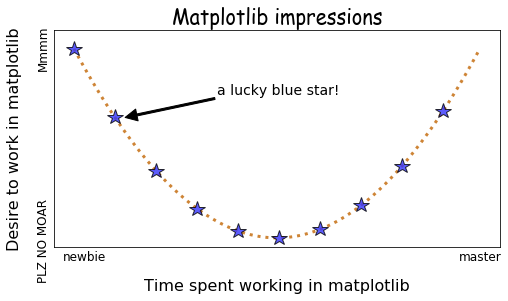

In [ ]:
x = np.linspace(-10, 10, 100)
y = x**2

# Basic plot...
plt.plot(x, y, color='#c26603', marker='*', markersize=16, markeredgecolor='black',
         markerfacecolor='#3333fc', linewidth=3, linestyle=':', alpha=0.8, markevery=10)


# Change the aspect
plt.gcf().set_size_inches((8, 4))

# # Set title and axis labels
plt.title("Matplotlib impressions", fontsize=20, fontname="Comic Sans MS")
plt.xlabel("Time spent working in matplotlib", fontsize=16, labelpad=15)
plt.ylabel("Desire to work in matplotlib", fontsize=16, labelpad=15)

# # # Replace tick labels with something more... descriptive
plt.xticks([-9.5, 10], ['newbie', 'master'], fontsize=12)
plt.yticks([18, 110], ['PLZ NO MOAR', 'Mmmm'], rotation=90, ha='right', fontsize=12)

# # # Hide ticks
plt.gca().tick_params(axis=u'both', which=u'both',length=0)

# # # Annotate the second star
plt.annotate("a lucky blue star!", (x[10] + 0.5, y[10]), xytext=(x[20] + 3, y[20] + 40),
             arrowprops=dict(facecolor='black', width=2), fontsize=14);

In [15]:
# We're not going to talk about seaborn just yet;
# we're just using its data loading utility to retrieve
# the iris dataset.
import seaborn as sns
iris = sns.load_dataset('iris')

Here's what the Iris dataset looks like:

In [16]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Now let's look at how we can go about composing a figure made up of many different subplots in matplotlib. We'll capitalize on the fact that the Iris dataset contains observations for 4 different attributes measured in 3 different Iris species to generate a 4 x 3 plot, where each cell shows a histogram of observations.

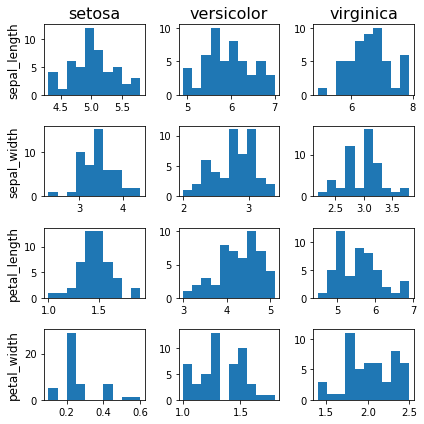

In [ ]:
# Set up the figure and axes--a 4 x 3 grid.
fig, axes = plt.subplots(4, 3, figsize=(6, 6))

# We'll plot each species of iris in a different column
species = ['setosa', 'versicolor', 'virginica']

# ..and a histogram of each attribute in a separate row
attrs = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i in range(3):
    sp = species[i]
    sp_data = iris.query('species == @sp')
    # Show column names
    axes[0, i].set_title(sp, fontsize="16")
    for j in range(4):
        attr = attrs[j]
        values = sp_data[attr]
        # plot separately on each Axes
        axes[j, i].hist(values)
        
        # Only plot y-axis label for first column
        if i == 0:
            axes[j, i].set_ylabel(attr, fontsize=12)


plt.tight_layout()

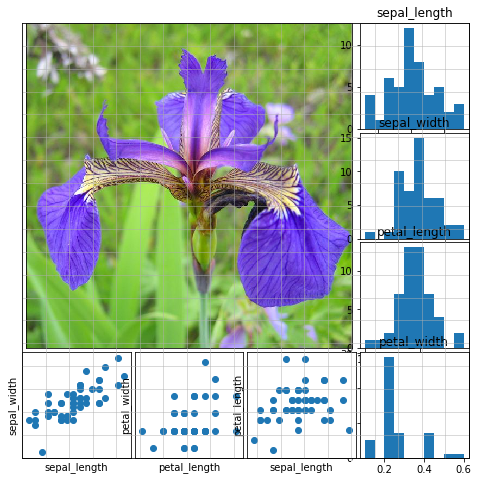

In [ ]:
import matplotlib.gridspec as gridspec

data = iris.query('species == "setosa"')

# Set up figure dimensions
fig = plt.figure(figsize=(8, 8))

# Create a 20 x 20 grid
gs = gridspec.GridSpec(20, 20)

big_ax = plt.subplot(gs[0:15, 0:15])

# We'll show a photograph of a setosa iris.
import matplotlib.image as mpimg
img = mpimg.imread('images/setosa.jpg')
big_ax.imshow(img)

# Hide ticks
big_ax.set_xticks([])
big_ax.set_yticks([])

# Add histograms on the right
attrs = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in range(4):
    start_ind = i * 5
    attr = attrs[i]
    hist_ax = plt.subplot(gs[start_ind:(start_ind + 5), 15:])
    hist_ax.hist(data[attr])
    hist_ax.set_title(attr, fontsize=12)
    
# And show bivariate scatterplots below
pairs = [
            ('sepal_length', 'sepal_width'),
            ('petal_length', 'petal_width'),
            ('sepal_length', 'petal_length')
        ]
for i in range(3):
    xvar, yvar = pairs[i]
    start_ind = i * 5
    scatter_ax = plt.subplot(gs[15:, start_ind:(start_ind + 5)])
    scatter_ax.scatter(data[xvar], data[yvar])
    scatter_ax.set_xlabel(xvar)
    scatter_ax.set_ylabel(yvar)
    scatter_ax.set_xticks([])
    scatter_ax.set_yticks([])
    
grid_ax = fig.add_subplot(111)
ticks = np.arange(0, 20, 1)
grid_ax.set_xticks(ticks)
grid_ax.set_yticks(ticks)
grid_ax.set_xticklabels([])
grid_ax.set_yticklabels([])
grid_ax.tick_params(color='white')
grid_ax.grid(True, alpha=0.6)
grid_ax.patch.set_alpha(0.)

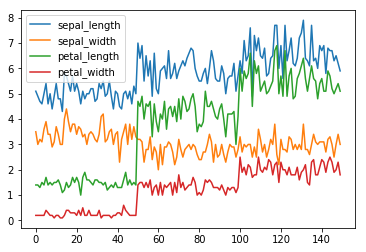

In [19]:
# KDE plot of all iris attributes, collapsing over species
iris.plot();

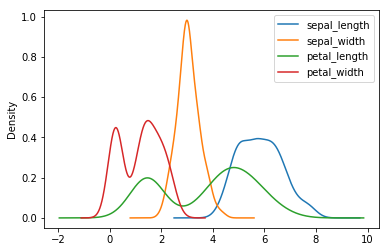

In [20]:
iris.plot(kind='kde');

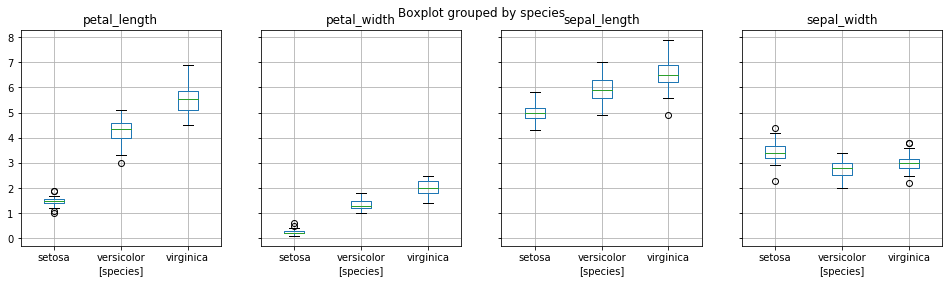

In [21]:
# Separate boxplot of iris attributes for each species
iris.boxplot(by='species', figsize=(16, 4), layout=(1, 4));

/Users/tal/miniconda3/envs/base/lib/python3.6/site-packages/pandas/plotting/_core.py:2257: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


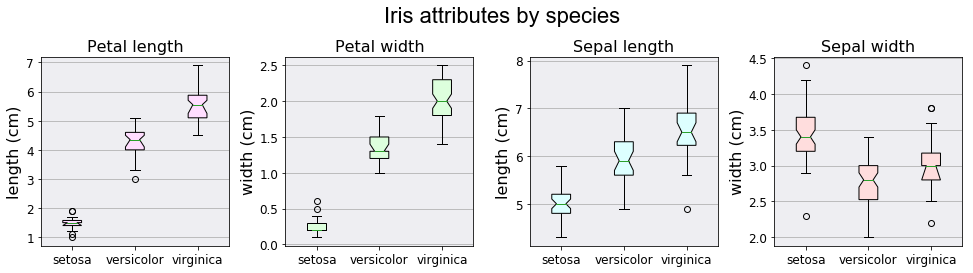

In [ ]:

fig, axes = plt.subplots(1, 4, figsize=(16, 3.5), sharey=False)


subplots = iris.boxplot(by='species', ax=axes, return_type='both', notch=True,
                        bootstrap=10000, patch_artist=True, fontsize=12);

varnames = ['Petal length', 'Petal width', 'Sepal length', 'Sepal width']
ylabels = ["length (cm)", "width (cm)", "length (cm)", "width (cm)"]
colors = ['#ffddff', '#ddffdd', '#ddffff', '#ffdddd']

# Stuff we need to do separately for each subplot
for i, sp in enumerate(subplots):
    # We asked for both the Axes and the boxplot's dict
    ax, box = sp
    # Embiggen title
    ax.set_title(varnames[i], fontsize=16)
    # Only show gridlines along y
    ax.grid(axis='x')
    # y-axis label
    ax.set_ylabel(ylabels[i], fontsize=16)
    # background
    ax.set_facecolor('#eeeef2')
    # Hide xlabel
    ax.set_xlabel('')
    
    # Set all boxes in the current subplot to the same color
    for patch in box['boxes']:
        patch.set(facecolor=colors[i], edgecolor='k', linewidth=1)
    for whisk in box['whiskers']:
        whisk.set(color='k')

# Change figure-level options
fig = plt.gcf()
fig.suptitle('Iris attributes by species', size=22, y=1.1, fontname='Arial')

# Fix spacing issues
plt.subplots_adjust(wspace=0.3)

### Seaborn


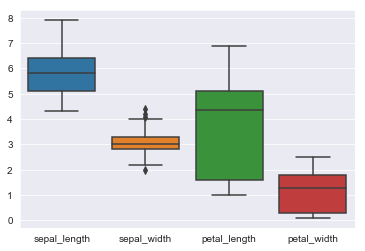

In [23]:
# Set to one of seaborn's built-in plotting styles
sns.set_style('darkgrid')

# Plot a boxplot for the iris dataset with all default parameters 
sns.boxplot(data=iris)

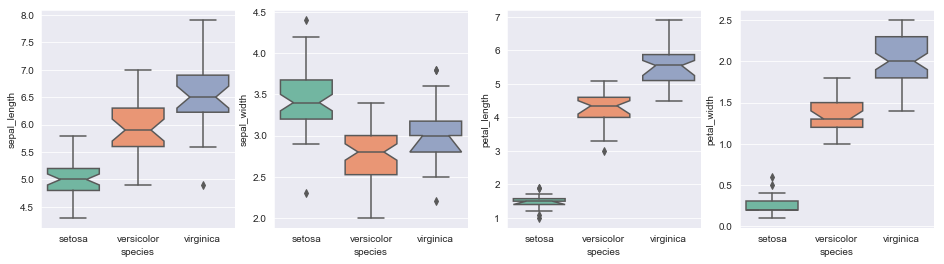

In [24]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=False)

# Explicitly list the variables to map onto subplots
variables = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# For each of the variables, use a different subplot
for i, var in enumerate(variables):
    species_data = iris[[var, 'species']]
    sns.boxplot(x='species', y=var, data=species_data, ax=axes[i], palette='Set2',
                notch=True, bootstrap=10000)

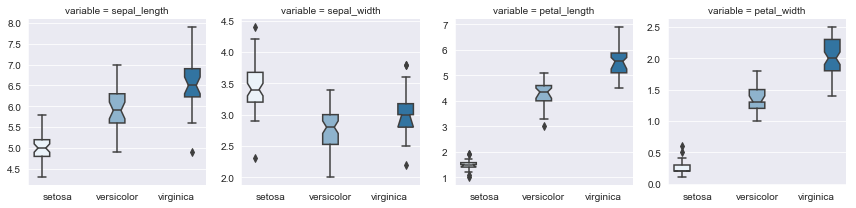

In [ ]:

iris_melted = iris.melt('species')


g = sns.FacetGrid(iris_melted, col='variable', sharey=False, )

# Apply the boxplot plotting function to each cell of the FacetGrid.
# Here, the first argument gives the plotting function, and subsequent
# arguments are passed through to the plotting function. I.e., 
g.map_dataframe(sns.boxplot, x='species', y='value', hue='species', notch=True, bootstrap=10000);

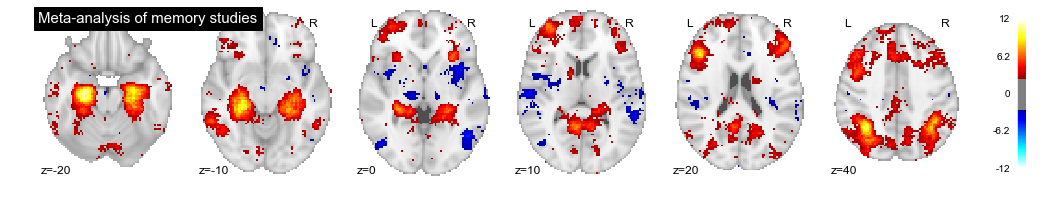

In [ ]:
# Import the plotting function we'll use
from nilearn.plotting import plot_stat_map


img = 'images/memory_association-test_z.nii.gz'

# Plot 6 axial slices, thresholding at p < .01 (i.e., z=2.58).
plot_stat_map(img, cut_coords=[-20, -10, 0, 10, 20, 40], display_mode='z',
              threshold=2.58, title="Meta-analysis of memory studies");